In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from IPython.display import Audio
import librosa

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

In [2]:
data_dir = '/Users/yingli/Development/TopicsInDataScience/voice_clip_selected/'
voice_feature = pd.read_csv(data_dir+"voice_feature_20241022.csv")

In [3]:
audiofile = [
    "common_voice_en_487076.mp3" # eighties female
    ,"common_voice_en_20661764.mp3" # eighties male
    ,"common_voice_en_1716.mp3" # seventies female
    ,"common_voice_en_20002554.mp3" # sixties male
    ,"common_voice_en_30282850.mp3" # fifties female
    ,"common_voice_en_39750682.mp3" # twenties female
    ,"common_voice_en_37110064.mp3"  # teen male
    ,"common_voice_en_31267867.mp3" # teen female
    ]

In [4]:
col_list_mfcc = ['mfcc_00', 'mfcc_01', 'mfcc_02', 'mfcc_03', 'mfcc_04', 'mfcc_05',
       'mfcc_06', 'mfcc_07', 'mfcc_08', 'mfcc_09', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17',
       'mfcc_18', 'mfcc_19', 'mfcc_20', 'mfcc_21', 'mfcc_22', 'mfcc_23',
       'mfcc_24']
col_list_f0 = ['f0_mean', 'f0_std','f0_var','f0_min','f0_max','f0_skew', 'f0_kurtosis']
col_list_zcr = ['zcr_mean','zcr_std','zcr_var','zcr_min','zcr_max','zcr_skew','zcr_kurtosis']

In [5]:
age_name = ['teens', 'twenties','thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties','nineties']
age_value = range(1,10)
age_dict = dict(zip(age_name, age_value))
gender_name = ["male_masculine","female_feminine"]
gender_value = [0,1]
gender_dict = dict(zip(gender_name, gender_value))
voice_feature['age'] = voice_feature['age'].map(age_dict)
voice_feature['gender'] = voice_feature['gender'].map(gender_dict)
voice_feature.dropna(inplace=True)

In [6]:
X = voice_feature[col_list_f0 + col_list_mfcc + col_list_zcr]
feature_names = col_list_f0 + col_list_mfcc+col_list_zcr
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
y = voice_feature.gender

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=7)

In [7]:
knn_clf = KNeighborsClassifier().fit(X_train, y_train)
nb_clf = MultinomialNB().fit(X_train,y_train)

In [8]:
def view_pred_result(model, X_test, y_test, thresh_min=0,thresh_max=0.5, thresh_inc=0.01):
    y_pred = model.predict(X_test)
    acc_pred = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print('Accuracy: ' + str(acc_pred))
    print('ROC Score: ' + str(roc_auc))

    cfm_df = pd.DataFrame()
    for i, thresh in enumerate(np.arange(thresh_min,thresh_max,thresh_inc)):
        y_pred_thresh = np.array((model.predict_proba(X_test)[:, 1] > thresh).astype(int))
        cfm = confusion_matrix(y_test,y_pred_thresh)
        cfm_df.loc[i,"Threshold"]=thresh
        cfm_df.loc[i,"True Negative"]=cfm[0,0]
        cfm_df.loc[i,"False Positive"]=cfm[0,1]
        cfm_df.loc[i,"False Negative"]=cfm[1,0]
        cfm_df.loc[i,"True Positive"]=cfm[1,1]
    cfm_df['FPR'] = cfm_df['False Positive']/(cfm_df['False Positive']+cfm_df['True Negative'])
    cfm_df['TPR'] = cfm_df['True Positive']/(cfm_df['False Negative']+cfm_df['True Positive'])
    #metrics.RocCurveDisplay.from_estimator(model, X_test, y_test)
    print(metrics.classification_report(y_test,y_pred, digits = 4))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    return cfm_df

Accuracy: 0.9754879709487063
ROC Score: 0.9949898755285569
              precision    recall  f1-score   support

           0     0.9787    0.9883    0.9835      3248
           1     0.9663    0.9396    0.9527      1158

    accuracy                         0.9755      4406
   macro avg     0.9725    0.9639    0.9681      4406
weighted avg     0.9754    0.9755    0.9754      4406



,Threshold,True Negative,False Positive,False Negative,True Positive,FPR,TPR
0,0.00,2922.0,326.0,4.0,1154.0,0.100369,0.996546
1,0.01,2922.0,326.0,4.0,1154.0,0.100369,0.996546
2,0.02,2922.0,326.0,4.0,1154.0,0.100369,0.996546
3,0.03,2922.0,326.0,4.0,1154.0,0.100369,0.996546
4,0.04,2922.0,326.0,4.0,1154.0,0.100369,0.996546
5,0.05,2922.0,326.0,4.0,1154.0,0.100369,0.996546
6,0.06,2922.0,326.0,4.0,1154.0,0.100369,0.996546
7,0.07,2922.0,326.0,4.0,1154.0,0.100369,0.996546
8,0.08,2922.0,326.0,4.0,1154.0,0.100369,0.996546
9,0.09,2922.0,326.0,4.0,1154.0,0.100369,0.996546


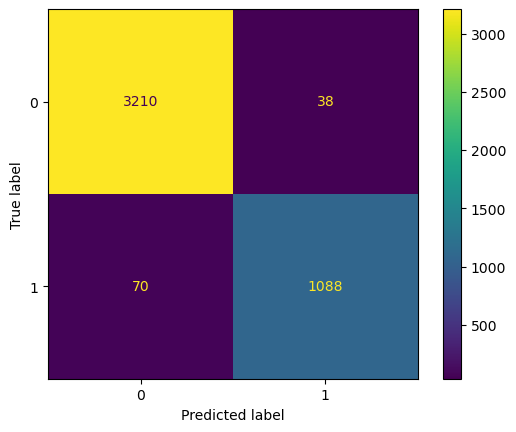

In [9]:
view_pred_result(knn_clf, X_test,y_test)

Accuracy: 0.7371765773944621
ROC Score: 0.8819055382560387
              precision    recall  f1-score   support

           0     0.7389    0.9951    0.8481      3248
           1     0.5000    0.0138    0.0269      1158

    accuracy                         0.7372      4406
   macro avg     0.6195    0.5044    0.4375      4406
weighted avg     0.6761    0.7372    0.6322      4406



,Threshold,True Negative,False Positive,False Negative,True Positive,FPR,TPR
0,0.00,0.0,3248.0,0.0,1158.0,1.000000,1.000000
1,0.01,0.0,3248.0,0.0,1158.0,1.000000,1.000000
2,0.02,0.0,3248.0,0.0,1158.0,1.000000,1.000000
3,0.03,0.0,3248.0,0.0,1158.0,1.000000,1.000000
4,0.04,0.0,3248.0,0.0,1158.0,1.000000,1.000000
5,0.05,0.0,3248.0,0.0,1158.0,1.000000,1.000000
6,0.06,0.0,3248.0,0.0,1158.0,1.000000,1.000000
7,0.07,0.0,3248.0,0.0,1158.0,1.000000,1.000000
8,0.08,0.0,3248.0,0.0,1158.0,1.000000,1.000000
9,0.09,0.0,3248.0,0.0,1158.0,1.000000,1.000000


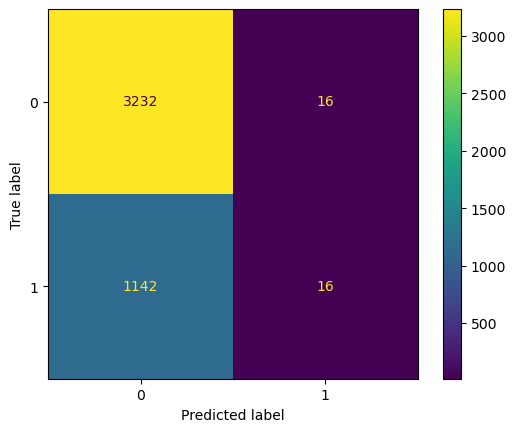

In [10]:
view_pred_result(nb_clf, X_test,y_test)

Accuracy: 0.7371765773944621
ROC Score: 0.8819055382560387
              precision    recall  f1-score   support

           0     0.7389    0.9951    0.8481      3248
           1     0.5000    0.0138    0.0269      1158

    accuracy                         0.7372      4406
   macro avg     0.6195    0.5044    0.4375      4406
weighted avg     0.6761    0.7372    0.6322      4406



,Threshold,True Negative,False Positive,False Negative,True Positive,FPR,TPR
0,0.10,0.0,3248.0,0.0,1158.0,1.000000,1.000000
1,0.13,0.0,3248.0,0.0,1158.0,1.000000,1.000000
2,0.16,58.0,3190.0,0.0,1158.0,0.982143,1.000000
3,0.19,694.0,2554.0,17.0,1141.0,0.786330,0.985320
4,0.22,2086.0,1162.0,81.0,1077.0,0.357759,0.930052
5,0.25,2874.0,374.0,271.0,887.0,0.115148,0.765976
6,0.28,3029.0,219.0,593.0,565.0,0.067426,0.487910
7,0.31,3095.0,153.0,874.0,284.0,0.047106,0.245250
8,0.34,3122.0,126.0,999.0,159.0,0.038793,0.137306
9,0.37,3146.0,102.0,1048.0,110.0,0.031404,0.094991


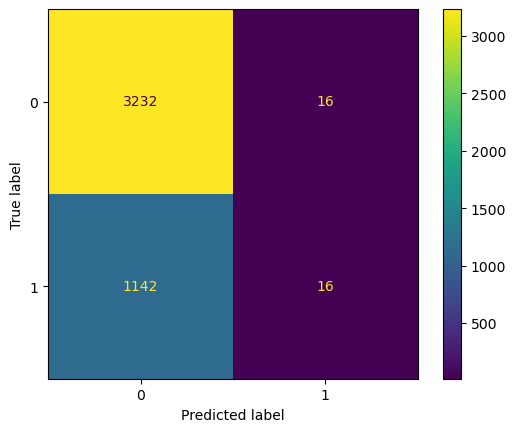

In [11]:
view_pred_result(nb_clf,X_test,y_test,thresh_min=0.1,thresh_max=0.8,thresh_inc=0.03)

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

def find_elbow(df, colnames, clusters_range):
    df_for_cluster = df.loc[:,colnames]
    stscaler = StandardScaler().fit(df_for_cluster)
    normalized_df = stscaler.transform(df_for_cluster)

    inertias = [] # wcss: Within Cluster Sum of Squares
    for k in clusters_range:
        kmeans = KMeans(init='k-means++',n_clusters=k,n_init=100, max_iter=300, random_state=0).fit(normalized_df)
        inertias.append(kmeans.inertia_)
    plt.figure()
    plt.plot(clusters_range,inertias, marker='o')
    plt.title('Elbow method for deciding on k')
    plt.xlabel('Number of clusters: k')
    plt.ylabel('inertia')
    plt.show()
    return

def run_kmeans(df, colnames, k):
    df_for_cluster = df.loc[:,colnames]
    stscaler = StandardScaler().fit(df_for_cluster)
    normalized_df = stscaler.transform(df_for_cluster)

    kmeans = KMeans(init='k-means++',n_clusters=k,n_init=100, max_iter=300, random_state=0).fit(normalized_df)
    df['cluster'] = kmeans.labels_
    return df

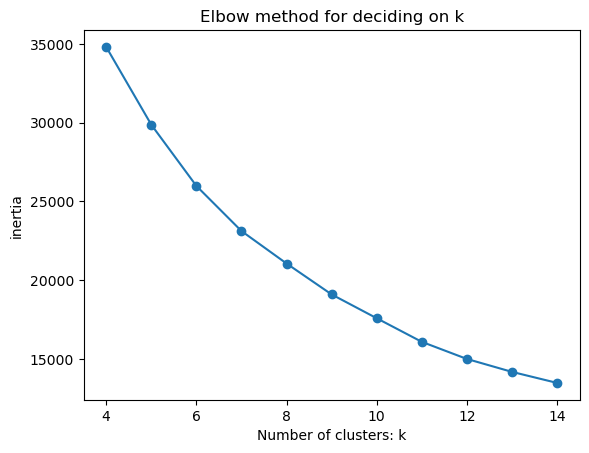

In [13]:
find_elbow(voice_feature,col_list_f0,[4,5,6,7,8,9,10,11,12,13,14])

In [14]:
k=6
voice_feature = run_kmeans(voice_feature,col_list_f0, k)
voice_feature.cluster.value_counts()

cluster
0    6491
4    3569
2    2299
5     654
1     228
3     109
Name: count, dtype: int64

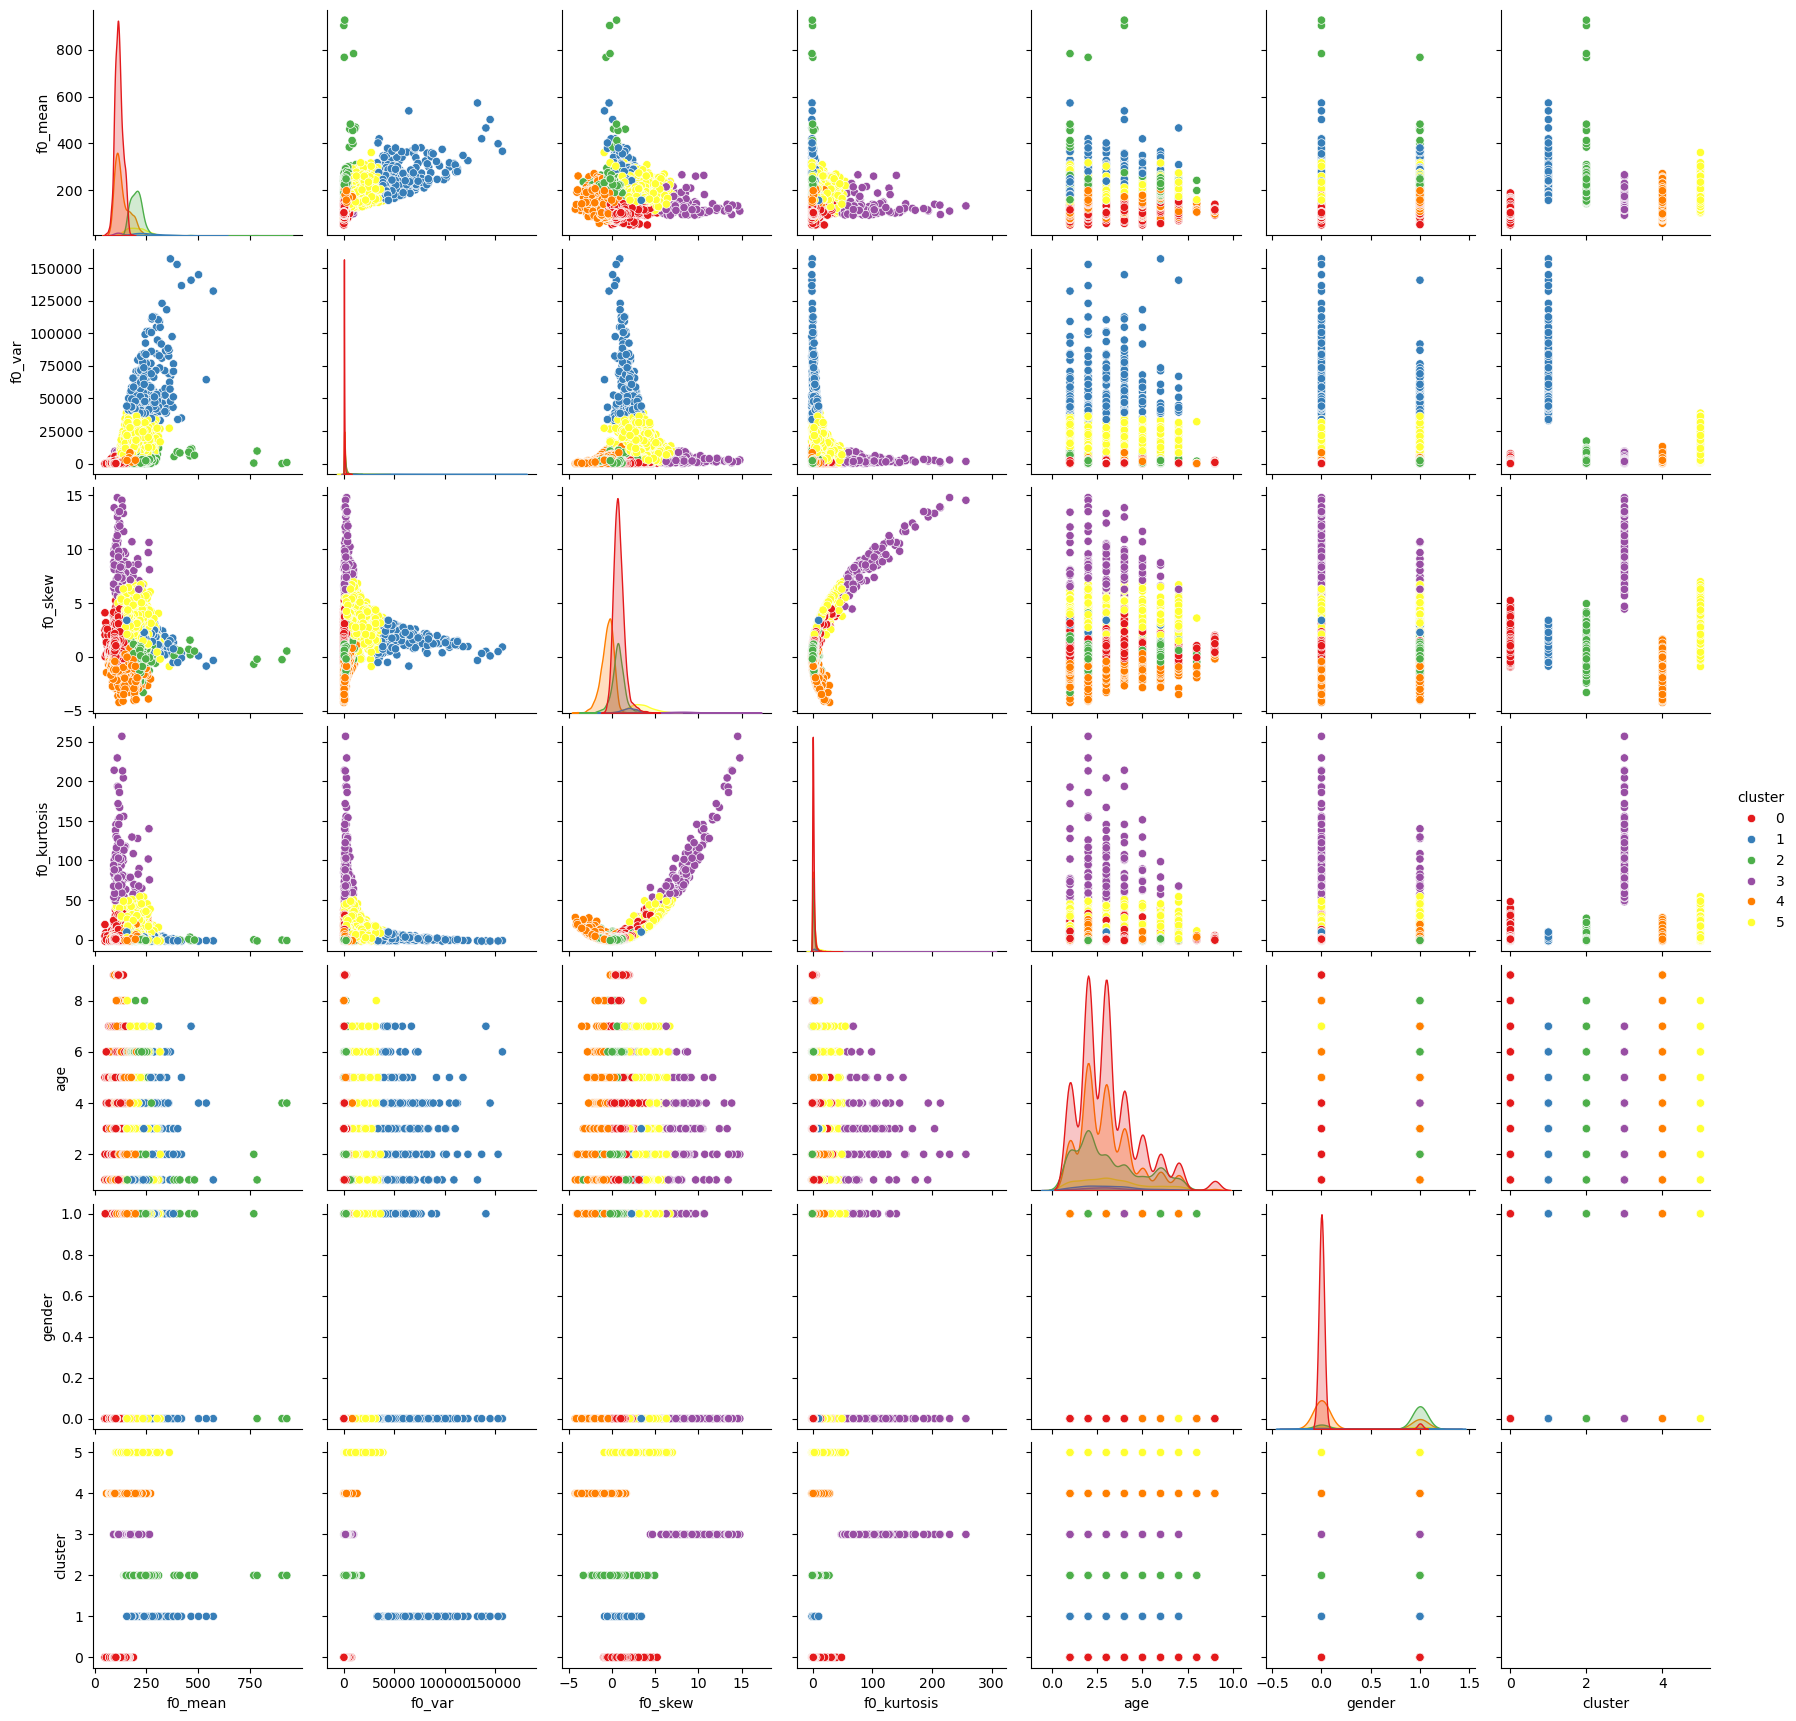

In [15]:
sns.pairplot(voice_feature, vars = ["f0_mean","f0_var","f0_skew", "f0_kurtosis", "age","gender","cluster"],hue="cluster",palette="Set1")

## PCA

* should scale the features
* MinMaxScaler seems to produce better results

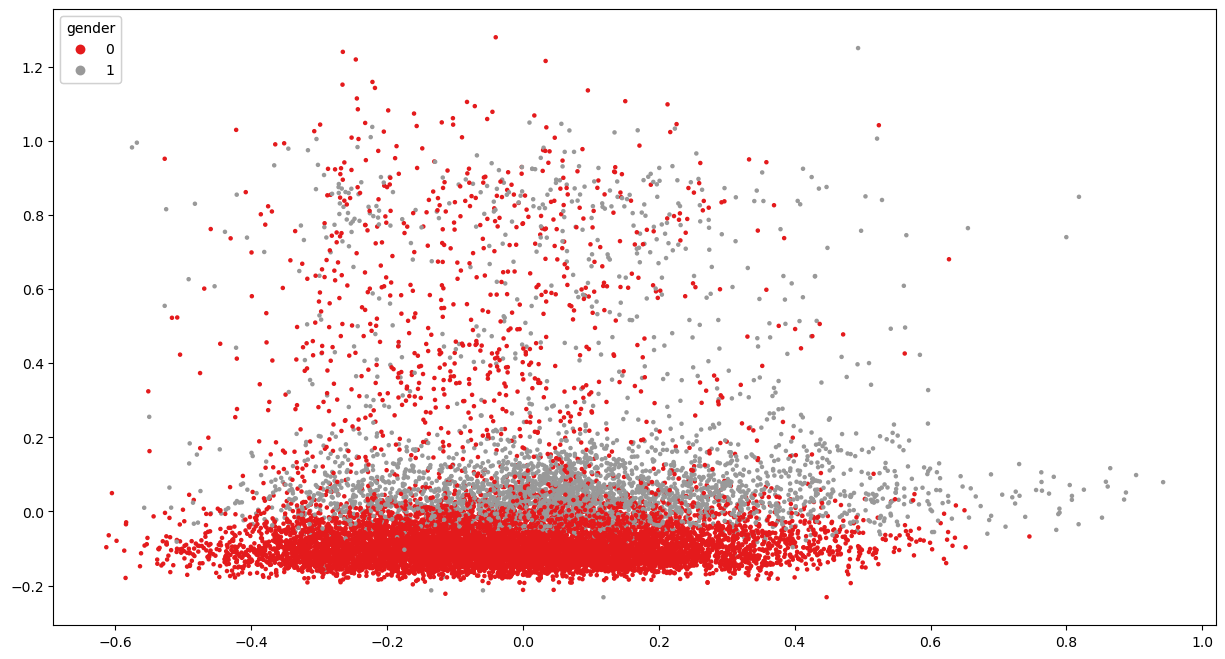

In [16]:
from sklearn.decomposition import SparsePCA
X = voice_feature[col_list_f0 + col_list_zcr]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
X_pca = SparsePCA(n_components=3).fit_transform(X)

fig, ax = plt.subplots(figsize=(15,8))
scatter = ax.scatter(X_pca[:,0],X_pca[:,1],c=voice_feature.gender,s=5, cmap=plt.cm.Set1)
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="gender")
ax.add_artist(legend)
plt.show()

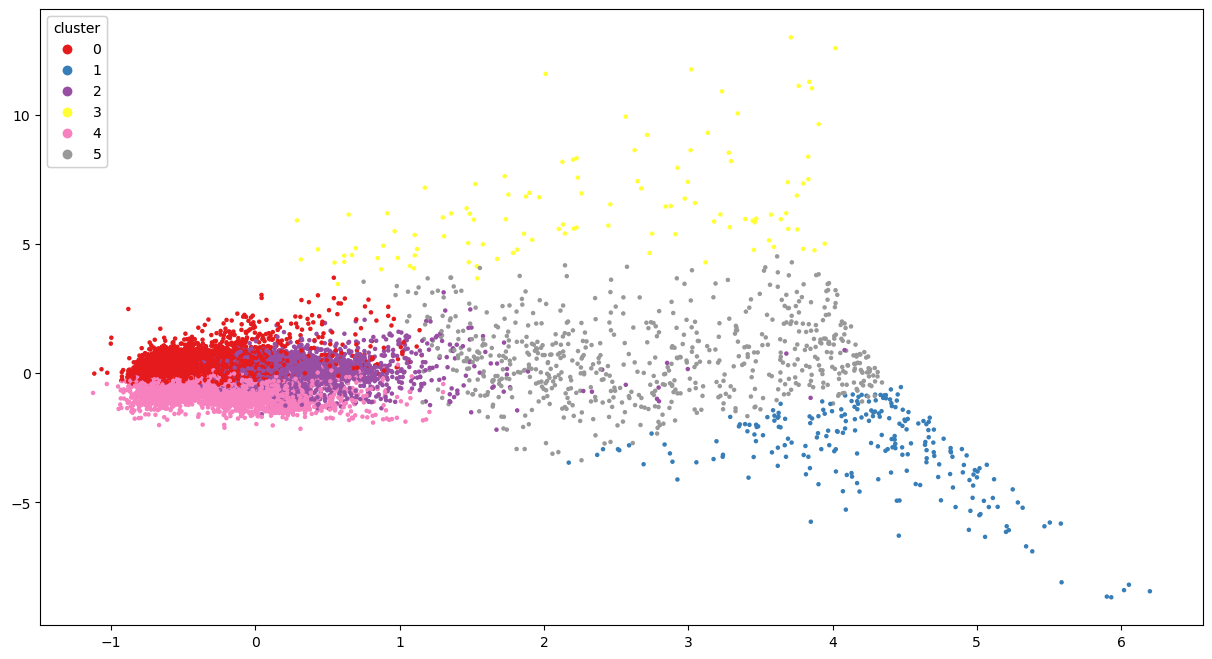

In [17]:
X = voice_feature[col_list_f0]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
X_pca = PCA(n_components=3, svd_solver='full', whiten = True).fit_transform(X)

fig, ax = plt.subplots(figsize=(15,8))
scatter = ax.scatter(X_pca[:,0],X_pca[:,1],c=voice_feature.cluster,s=5, cmap=plt.cm.Set1)
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="cluster")
ax.add_artist(legend)
plt.show()

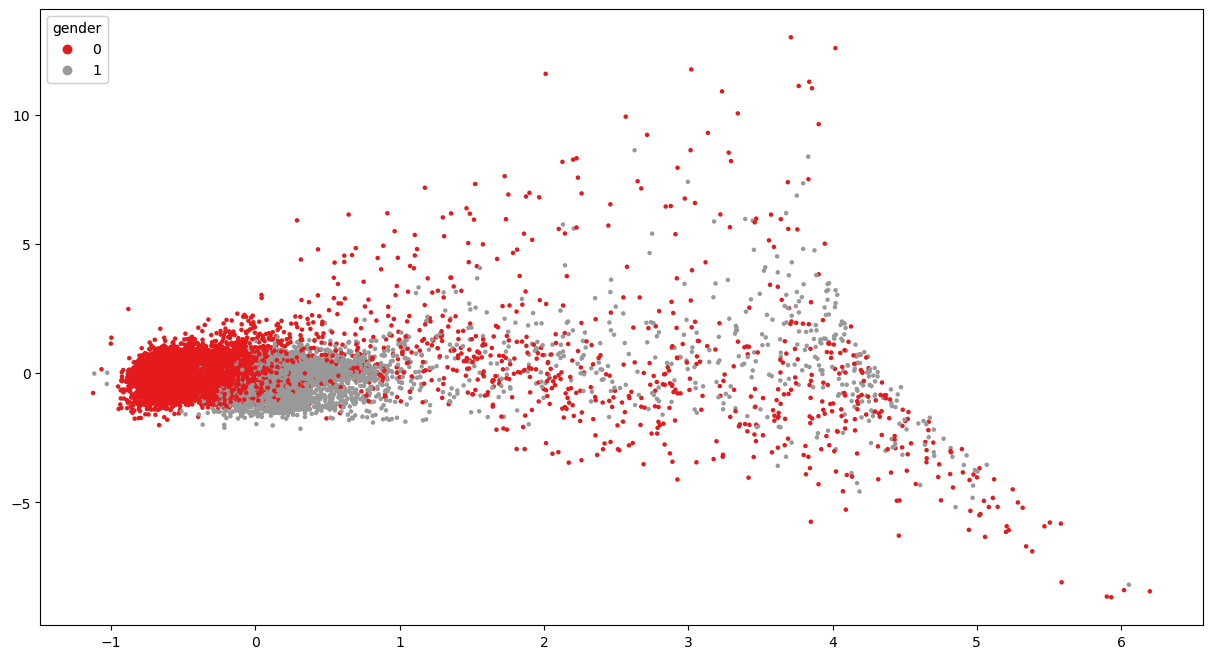

In [18]:
X = voice_feature[col_list_f0]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
X_pca = PCA(n_components=2, svd_solver='full', whiten = True).fit_transform(X)

fig, ax = plt.subplots(figsize=(15,8))
scatter = ax.scatter(X_pca[:,0],X_pca[:,1],c=voice_feature.gender,s=5, cmap=plt.cm.Set1)
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="gender")
ax.add_artist(legend)
plt.show()

## Make prediction on speaker recognition

In [19]:
speaker_selected = '27c2bcb5074395819c7360c4a8711977e6258352ab80dc99bd9708f9eda0de82064daa9dad6a28ac8e543c3d6702adc2c7ad9f4ff7b4e86d399955f3b7021318'
voice_feature['speaker'] = 1 * (voice_feature["client_id"] == speaker_selected)
df1 = voice_feature.query("speaker == 1").copy().reset_index()
df2 = voice_feature.query("speaker == 0").copy().reset_index()
df2 = df2.sample(n=167*5, weights='age', replace=False, random_state=7)
voice_feature_speaker = pd.concat([df2,df1],axis=0)

In [20]:
X = voice_feature_speaker[col_list_f0 + col_list_mfcc + col_list_zcr]
y = voice_feature_speaker.speaker

scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=7)

knn_clf = KNeighborsClassifier().fit(X_train, y_train)
nb_clf = MultinomialNB().fit(X_train,y_train)
rf_clf = RandomForestClassifier(random_state=7).fit(X_train, y_train)

### make prediction on speakers

We can use any speakers that were not involved in training or testing, we can use 8 speakers we have picked out earlier for playing sound. We know they are not the selected speaker that we build the classifier for. We can verify. 

In [21]:
voice_feature_speaker.query("path in @audiofile").path.sum()

0

In [22]:
voice_to_pred = voice_feature.query("path in @audiofile")
X_to_pred = voice_to_pred[col_list_f0+col_list_mfcc+col_list_zcr]
X_to_pred = scaler.transform(X_to_pred)
y_to_pred_result = knn_clf.predict(X_to_pred)
y_to_pred_result


array([0, 0, 0, 0, 0, 0, 0])

In [23]:
y_to_pred_result = nb_clf.predict(X_to_pred)
y_to_pred_result


array([0, 0, 0, 0, 0, 0, 0])

In [24]:
y_to_pred_result = rf_clf.predict(X_to_pred)
y_to_pred_result


array([0, 0, 0, 0, 0, 0, 0])

in fact we can run the prediction on any of the clips that were not used in the training and testing. 

In [25]:
voice_feature.path.count()

13350

In [26]:
voice_to_pred.path.count(), voice_feature_speaker.path.count(), voice_to_pred.path.count() + voice_feature_speaker.path.count()

(7, 971, 978)

In [27]:
speaker_seen = voice_feature_speaker.path.to_list() 
voice_to_pred = voice_feature.query("path not in @speaker_seen")

X_to_pred = voice_to_pred[col_list_f0+col_list_mfcc+col_list_zcr]
X_to_pred = scaler.transform(X_to_pred)


In [28]:
y_to_pred_result = knn_clf.predict(X_to_pred)
y_to_pred_result.sum()/len(y_to_pred_result), y_to_pred_result.sum(), len(y_to_pred_result)

(0.008724452702156878, 108, 12379)

In [29]:
y_to_pred_result = nb_clf.predict(X_to_pred)
y_to_pred_result.sum()/len(y_to_pred_result), y_to_pred_result.sum(), len(y_to_pred_result)

(0.0, 0, 12379)

In [30]:
y_to_pred_result = rf_clf.predict(X_to_pred)
y_to_pred_result.sum()/len(y_to_pred_result), y_to_pred_result.sum(), len(y_to_pred_result)

(0.00024234590839324662, 3, 12379)